# GPyOpt
正直physboは使いにくかった、、、
* https://qiita.com/shinmura0/items/2b54ab0117727ce007fd
* https://qiita.com/shinmura0/items/d932d4e6d7bf2fd86e11
* https://qiita.com/YSRKEN/items/eaed031149b4931fbbc7
* https://qiita.com/marshi/items/51b82a7b990d51bd98cd
* https://sci-by-py.com/python_library/gpyopt/ #udemy
* https://kiseno-log.com/2020/07/02/python%E3%81%A7%E5%AE%9F%E9%A8%93%E8%A8%88%E7%94%BB%EF%BC%9A%E3%83%A9%E3%83%86%E3%83%B3%E8%B6%85%E6%96%B9%E6%A0%BC/ #ラテン超方格
* https://hk29.hatenablog.jp/entry/2020/11/07/130217

## DEAPとの比較用
https://qiita.com/shinmura0/items/2b54ab0117727ce007fd

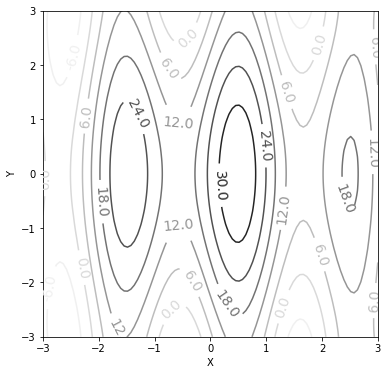

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#関数の定義
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

X, Y = np.meshgrid(x, y)
Z = 0.1*(X**2+Y**2-16)**2 + 10*np.sin(3*X)#Zは山の高さ

#グラフのプロット
plt.figure(figsize=(6, 6))
cont = plt.contour(X, Y, Z, cmap="Greys")
cont.clabel(fmt='%1.1f', fontsize=14)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [7]:
import GPy
import GPyOpt
import numpy as np

#最適化する関数
def f(x):
    X, Y = x[:,0], x[:,1]
    z = -(0.1*(X**2+Y**2-16)**2 + 10*np.sin(3*X)) #GPyOptは最小値を探索する->マイナスかける
    print(-z)
    return z

#状態変数の幅
bounds = [{"name": "X", "type": "continuous", "domain": (-3, 3)},
         {"name": "Y", "type": "continuous", "domain": (-3, 3)}]

#ベイズ最適化
myopt = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds)
# f:最適化したい関数
# domain:最適化条件(範囲)
# constraints:制約条件
# initial_design_numdata:事前データ数.デフォルトは5.実行時にdesign_typeで指定した方法で生成される
# initial_design_type:"random", "latin"
# accquisition_type:獲得関数 "EI"(デフォルト), "MPI", "LCB"

myopt.run_optimization(max_iter=30)#ランダムに5点+30回のベイズ最適化を実施

[12.82293568]
[-1.24355439]
[34.10222828]
[22.50793827]
[5.4175928]
[31.42437735]
[27.63718731]
[-3.72118485]
[30.92346307]
[4.52118485]
[-3.72118485]
[27.61229315]
[-0.40159814]
[16.94538324]
[26.73190698]
[8.74251594]
[5.48673967]
[31.66595708]
[34.16190515]
[4.52118485]
[-4.84183231]
[7.43126114]
[4.25733209]
[23.10787775]
[16.50734165]
[34.53563372]
[34.70878711]
[33.57116755]
[33.81121238]
[29.46657242]
[29.52559576]
[34.78223537]
[34.37539185]
[9.74274486]
[34.66302949]


In [12]:
#最適値の出力 (x, y)とz
print(myopt.x_opt)
print(-myopt.fx_opt)

[0.48738634 0.03697476]
34.782235366463794


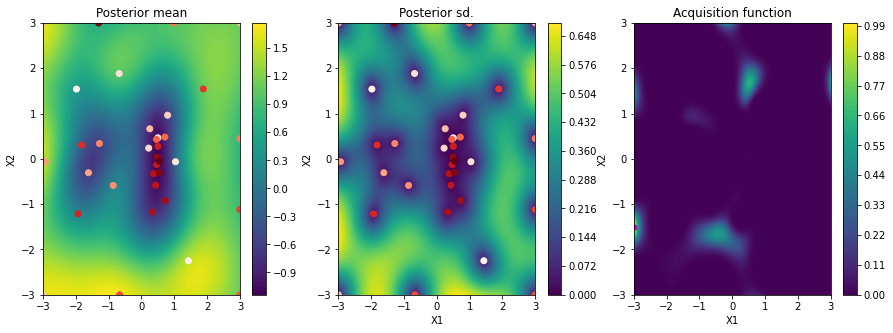

In [16]:
#獲得関数の表示
myopt.plot_acquisition()

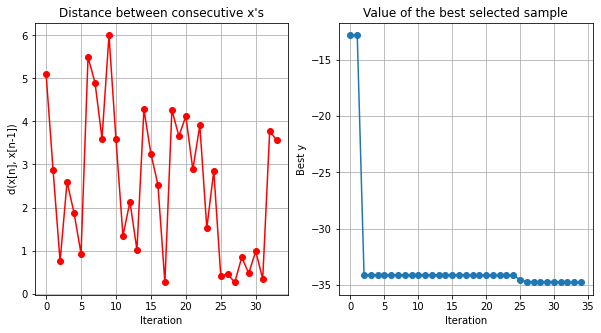

In [15]:
#収束確認
myopt.plot_convergence()

In [21]:
#探索履歴の保存
result_x = myopt.X
result_z = -myopt.Y

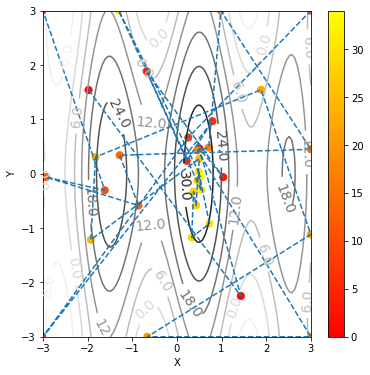

In [23]:
plt.figure(figsize=(6, 6))
cont = plt.contour(X, Y, Z, cmap="Greys")
cont.clabel(fmt='%1.1f', fontsize=14)
plt.xlabel("X")
plt.ylabel("Y")
sc = plt.scatter(result_x[:,0], result_x[:,1],s=50,
 c=range(len(result_x)),cmap="autumn")
plt.colorbar(sc)
plt.plot(result_x[:,0], result_x[:,1], linestyle="dashed")
plt.show()

## 獲得関数の比較
EI, MPI, LCB

In [47]:
myopt_EI = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds, acquisition_type="EI")
myopt_EI.run_optimization(max_iter=50)#ランダムに5点+30回のベイズ最適化を実施

myopt_MPI = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds, acquisition_type="MPI")
myopt_MPI.run_optimization(max_iter=50)#ランダムに5点+30回のベイズ最適化を実施

myopt_LCB = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds, acquisition_type="LCB")
myopt_LCB.run_optimization(max_iter=50)#ランダムに5点+30回のベイズ最適化を実施

[-6.65071762]
[1.234723]
[-0.65284769]
[4.17566306]
[11.07409633]
[15.82392091]
[3.22189235]
[15.12977519]
[11.10385517]
[23.19906366]
[27.24021164]
[28.36572984]
[27.27403678]
[1.92611364]
[26.72240902]
[26.84515823]
[20.23427082]
[-2.42366618]
[13.36502755]
[-3.85002123]
[17.21772714]
[30.96572918]
[18.43086883]
[19.42075695]
[30.96572918]
[18.53385477]
[22.00699902]
[9.91389829]
[-0.65756585]
[5.27112929]
[3.18610402]
[10.03209879]
[20.23427082]
[-5.36537671]
[5.42130251]
[20.53585569]
[34.03502112]
[34.40825782]
[33.13261733]
[33.83798754]
[33.60924957]
[31.58915038]
[34.78059972]
[30.0086553]
[-0.49588745]
[34.45151212]
[33.83911328]
[34.36338978]
[7.26833803]
[6.71305473]
[1.8450219]
[33.69866666]
[26.15444156]
[16.03669008]
[0.20992666]
[14.74654215]
[8.40560259]
[27.73172784]
[6.74837382]
[-2.12525226]
[28.7414948]
[29.19651629]
[32.27312394]
[33.68282009]
[33.93740444]
[33.89093001]
[34.14748321]
[-1.75637571]
[20.23427082]
[20.23427082]
[-8.33680933]
[30.96572918]
[17.7246754

In [48]:
result_EI = -myopt_EI.Y
result_MPI = -myopt_MPI.Y
result_LCB = -myopt_LCB.Y

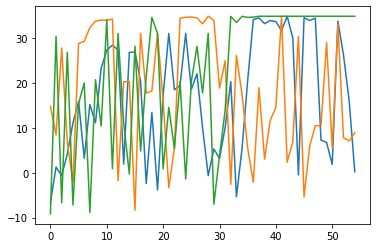

In [49]:
plt.plot(result_EI)
plt.plot(result_MPI)
plt.plot(result_LCB)

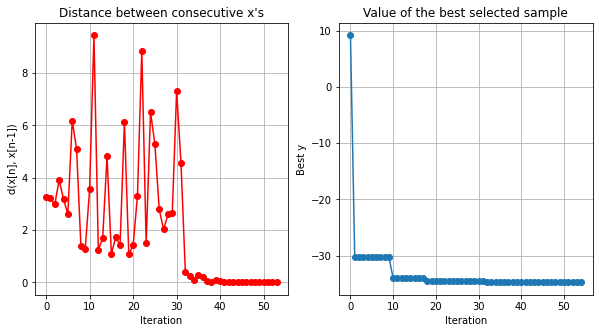

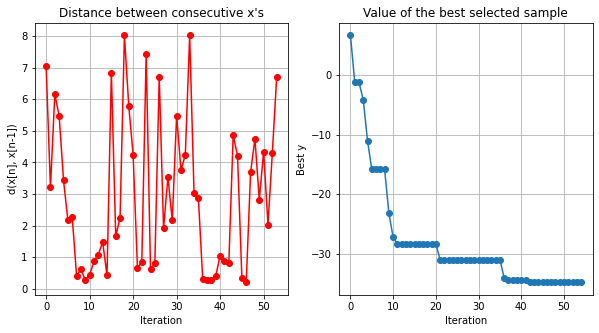

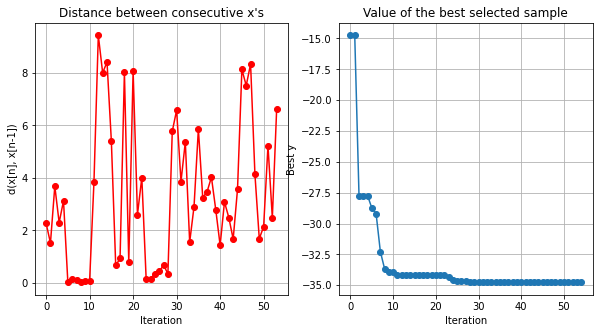

In [50]:
myopt_LCB.plot_convergence()
myopt_EI.plot_convergence()
myopt_MPI.plot_convergence()

## 制約条件を設定する場合
1. https://www.blopig.com/blog/wp-content/uploads/2019/10/GPyOpt-Tutorial1.html
2. https://nbviewer.jupyter.org/github/SheffieldML/GPyOpt/blob/devel/manual/GPyOpt_constrained_optimization.ipynb

### 1

In [79]:
from numpy.random import multivariate_normal

def obj_func_2d(x,y):
    return((x**2 + y**2)*(np.sin(x)**2 - np.cos(y)))

def stochastic_obj_func_2d_const(x):
    mu1, mu2, Sig_diag1, Sig_diag2, Sig_Cross = x[:,0], x[:,1], x[:,2], x[:,3], x[:,4]
    
    mu = np.array([mu1[0], mu2[0]]).flatten()
    Sigma = np.array([[Sig_diag1[0], Sig_Cross[0]], [Sig_Cross[0], Sig_diag2[0]]])
    sample = multivariate_normal(mu, Sigma, check_valid="raise")
    return (obj_func_2d(sample[0], sample[1]))

In [80]:
bounds = [{'name': 'mu_1', 'type': 'continuous', 'domain': (0,10)},
        {'name': 'mu_2', 'type': 'continuous', 'domain': (0,10)},
         {'name': 'Sig_diag_1', 'type': 'continuous', 'domain': (0,5)},
         {'name': 'Sig_diag_2', 'type': 'continuous', 'domain': (0,5)},
         {'name': 'Sig_Cross', 'type': 'continuous', 'domain': (-5,5)}]

constraints = [{'name': 'constr_1', 'constraint': '-x[:,2]'},
              {'name': 'constr_2', 'constraint': '-x[:,3]'},
              {'name': 'constr_3', 'constraint': '-x[:,2]*x[:,3] + x[:,4]**2'}]



In [81]:
#Determine the subset where we are allowed to sample
feasible_region = GPyOpt.Design_space(space = bounds, constraints = constraints) 
initial_design = GPyOpt.experiment_design.initial_design('random', feasible_region, 10)

#CHOOSE the objective
objective = GPyOpt.core.task.SingleObjective(stochastic_obj_func_2d_const)

# CHOOSE the model type
model = GPyOpt.models.GPModel(exact_feval=True,optimize_restarts=10,verbose=False)

#CHOOSE the acquisition optimizer
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(feasible_region)

#CHOOSE the type of acquisition
acquisition = GPyOpt.acquisitions.AcquisitionEI(model, feasible_region, optimizer=aquisition_optimizer)

#CHOOSE a collection method
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

In [54]:
# Now create BO object
bo = GPyOpt.methods.ModularBayesianOptimization(model, feasible_region, objective, acquisition, evaluator, initial_design)

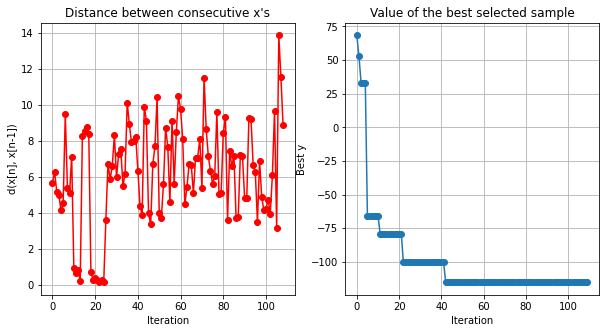

In [57]:
# --- Stop conditions
max_time  = None 
max_iter  = 100
tolerance = 1e-8     # distance between two consecutive observations 
                     # if we're sampling a region in such fine detail then it is likely that we've found the true min.

# Run the optimization                                                  
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance, verbosity=False) 
bo.plot_convergence()

### 2
目的関数  
$$f(x_1, x_2) = 4x_1^2-2.1x_1^4+x_1^6/3+x_1 x_2-4x_2^2+4x_2^4$$

In [59]:
#目的関数はavailable in GPyOpt
func = GPyOpt.objective_examples.experiments2d.sixhumpcamel()

In [60]:
#探査空間の設定
space =[{'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)},
        {'name': 'var_2', 'type': 'continuous', 'domain': (-1.5,1.5)}]

制約条件  
$$-x_2-0.5+|x_1|-\sqrt{1-x_1^2}<0$$
$$x_2+0.5+|x_1|-\sqrt{1-x_1^2}<0$$

以下公式(https://gpyopt.readthedocs.io/en/latest/GPyOpt.core.task.html) より抜粋
> Each restriction is of the form c(x) <= 0 where c(x) is a function of the input variables previously defined in the space

In [61]:
constraints = [{'name': 'constr_1', 'constraint': '-x[:,1] -.5 + abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'},
              {'name': 'constr_2', 'constraint': 'x[:,1] +.5 - abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'}]

In [63]:
# design_spaceのオブジェクト作成
feasible_region = GPyOpt.Design_space(space = space, constraints = constraints)

Text(0.5, 1.0, 'Six-Hump Camel function')

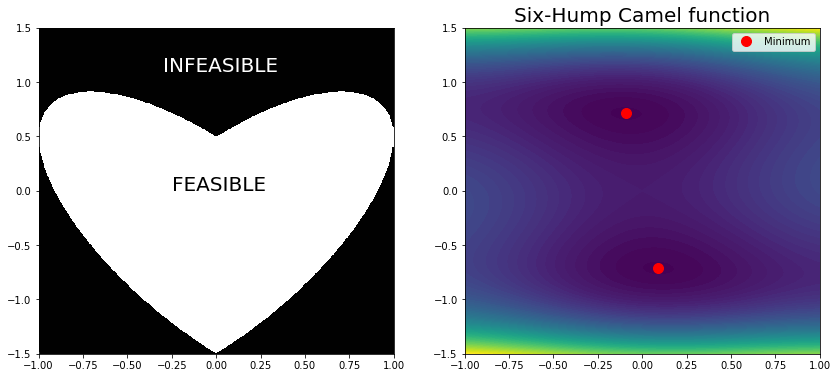

In [64]:
## Grid of points to make the plots
grid = 400
bounds = feasible_region.get_continuous_bounds()
X1 = np.linspace(bounds[0][0], bounds[0][1], grid)
X2 = np.linspace(bounds[1][0], bounds[1][1], grid)
x1, x2 = np.meshgrid(X1, X2)
X = np.hstack((x1.reshape(grid*grid,1),x2.reshape(grid*grid,1)))

## Check the points in the feasible region.
masked_ind = feasible_region.indicator_constraints(X).reshape(grid,grid)
masked_ind = np.ma.masked_where(masked_ind > 0.5, masked_ind)
masked_ind[1,1]=1

## Make the plots
plt.figure(figsize=(14,6))

# Feasible region
plt.subplot(121)
plt.contourf(X1, X2, masked_ind ,100, cmap= plt.cm.bone, alpha=1,origin ='lower')
plt.text(-0.25,0,'FEASIBLE',size=20)
plt.text(-0.3,1.1,'INFEASIBLE',size=20,color='white')

plt.subplot(122)
plt.plot()
plt.contourf(X1, X2, func.f(X).reshape(grid,grid),100, alpha=1,origin ='lower')
plt.plot(np.array(func.min)[:,0], np.array(func.min)[:,1], 'r.', markersize=20, label=u'Minimum')
plt.legend()
plt.title('Six-Hump Camel function',size=20)

今回の制約条件では2つのglobal minimaのうち1点のみがfeasible  
以下図示する

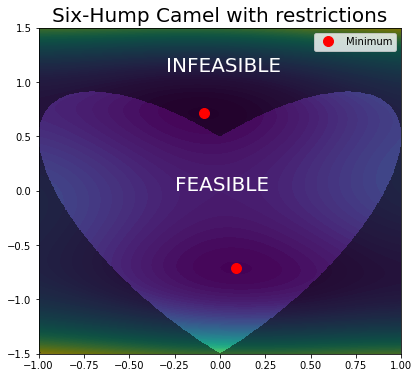

In [65]:
plt.figure(figsize=(6.5,6))
OB = plt.contourf(X1, X2, func.f(X).reshape(grid,grid),100,alpha=1)
IN = plt.contourf(X1, X2, masked_ind ,100, cmap= plt.cm.bone, alpha=.5,origin ='lower')
plt.text(-0.25,0,'FEASIBLE',size=20,color='white')
plt.text(-0.3,1.1,'INFEASIBLE',size=20,color='white')
plt.plot(np.array(func.min)[:,0], np.array(func.min)[:,1], 'r.', markersize=20, label=u'Minimum')
plt.title('Six-Hump Camel with restrictions',size=20)
plt.legend()

In [71]:
# --- CHOOSE the intial design
from numpy.random import seed # fixed seed
seed(123456)

#initial designの作成(np.array)
initial_design = GPyOpt.experiment_design.initial_design('random', feasible_region, 10)

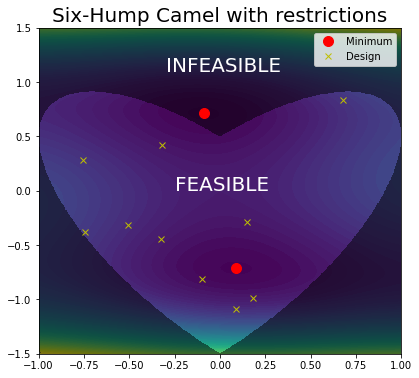

In [72]:
plt.figure(figsize=(6.5,6))
OB = plt.contourf(X1, X2, func.f(X).reshape(grid,grid),100,alpha=1)
IN = plt.contourf(X1, X2, masked_ind ,100, cmap= plt.cm.bone, alpha=.5,origin ='lower')
plt.text(-0.25,0,'FEASIBLE',size=20,color='white')
plt.text(-0.3,1.1,'INFEASIBLE',size=20,color='white')
plt.plot(np.array(func.min)[:,0], np.array(func.min)[:,1], 'r.', markersize=20, label=u'Minimum')
plt.title('Six-Hump Camel with restrictions',size=20)
plt.plot(initial_design[:,0],initial_design[:,1],'yx',label = 'Design')
plt.legend()

In [73]:
# --- CHOOSE the objective
objective = GPyOpt.core.task.SingleObjective(func.f)

# --- CHOOSE the model type
model = GPyOpt.models.GPModel(exact_feval=True,optimize_restarts=10,verbose=False)

# --- CHOOSE the acquisition optimizer
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(feasible_region)

# --- CHOOSE the type of acquisition
acquisition = GPyOpt.acquisitions.AcquisitionEI(model, feasible_region, optimizer=aquisition_optimizer)

# --- CHOOSE a collection method
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

In [74]:
# BO object
bo = GPyOpt.methods.ModularBayesianOptimization(model, feasible_region, objective, acquisition, evaluator, initial_design)

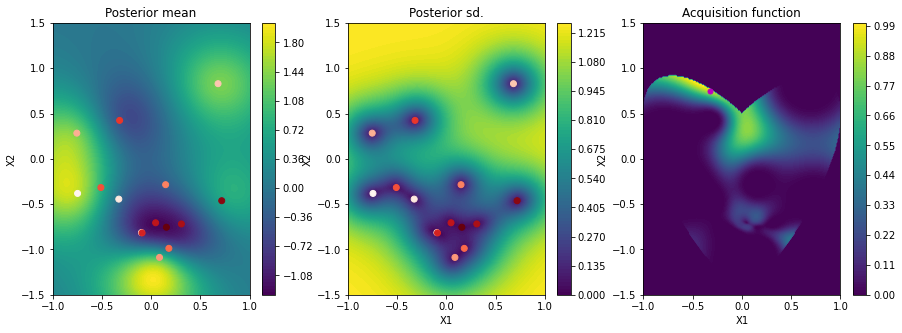

In [75]:
# --- Stop conditions
max_time  = None 
max_iter  = 5
tolerance = 1e-8     # distance between two consecutive observations  

# Run the optimization                                                  
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance, verbosity=False) 
bo.plot_acquisition()

In [76]:
# Run the optimization  
max_iter  = 25
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance, verbosity=False) 


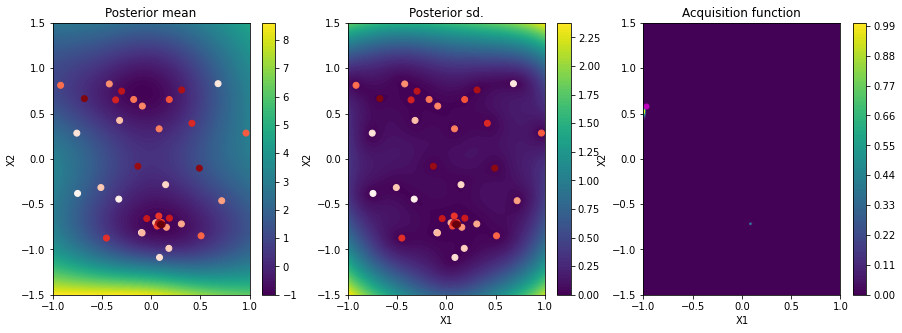

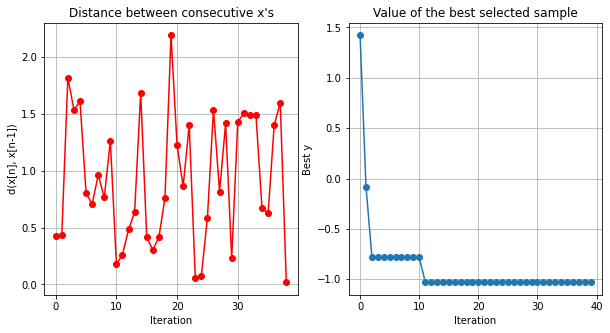

In [77]:
bo.plot_acquisition()
bo.plot_convergence()

## 多目的最適化
GPyOptは多目的最適化に対応していない
https://github.com/SheffieldML/GPyOpt/issues/306

  
トレードオフパラメータを導入すれば擬似的に実現可能
> You might try collapsing the two objectives into a single objective with a "trade-off" parameter - this approach is used pretty widely e.g. when balancing exploration and exploitation (though that's in the acquisition function - same principle here.) Your trade-off parameter could be o1,o2=your_func(X); y=trade_off(o1,o2,alpha) where e.g. trade_off = lambda o1,o2,a: (a*o1)+((1-a)*o2) for \alpha\in[0,1].

## Save and Load
https://github.com/SheffieldML/GPyOpt/issues/69  
ファイルをセーブして、次回再開時に読み込む。  
実験計画法的に使える。

[19.00888084]
[11.75037205]
[15.51387489]
[22.65876987]
[-0.9392622]
[27.80251133]
[11.81781015]
[29.05859075]
[31.17991405]
[29.64684768]


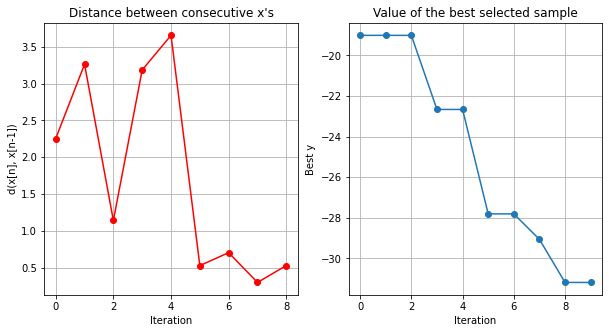

In [87]:
import GPy
import GPyOpt
import numpy as np

#最適化する関数
def f(x):
    X, Y = x[:,0], x[:,1]
    z = -(0.1*(X**2+Y**2-16)**2 + 10*np.sin(3*X)) #GPyOptは最小値を探索する->マイナスかける
    print(-z)
    return z

#状態変数の幅
bounds = [{"name": "X", "type": "continuous", "domain": (-3, 3)},
         {"name": "Y", "type": "continuous", "domain": (-3, 3)}]

#ベイズ最適化
myopt = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds)
# f:最適化したい関数
# domain:最適化条件(範囲)
# constraints:制約条件
# initial_design_numdata:事前データ数.デフォルトは5.実行時にdesign_typeで指定した方法で生成される
# initial_design_type:"random", "latin"
# accquisition_type:獲得関数 "EI"(デフォルト), "MPI", "LCB"

myopt.run_optimization(max_iter=5)#ランダムに5点+30回のベイズ最適化を実施
myopt.save_evaluations("ev_file.csv")
myopt.plot_convergence()

ファイルを読み込み再開する

In [89]:
#restart from file
import pandas as pd
for i in range(30 - 5):
    evals = pd.read_csv("ev_file.csv", index_col=0, delimiter="\t")
    Y = np.array([[x] for x in evals["Y"]])
    X = np.array(evals.filter(regex="var*"))
    myopt = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds, X=X, Y=Y)
    myopt.run_optimization(1)
    myopt.save_evaluations("ev_file.csv")

[14.93192422]
[33.17694763]
[-3.72118485]
[4.52118485]
[-3.72118485]
[4.52118485]
[34.25128078]
[-4.41567565]
[28.63768779]
[34.27397097]
[34.63241731]
[-6.76510075]
[-0.66767889]
[34.60139647]
[10.11272217]
[23.9187186]
[33.67062324]
[4.02721934]
[34.72486336]
[6.82923273]
[-5.58997472]
[8.32490535]
[31.96521834]
[34.44278299]
[5.46944223]


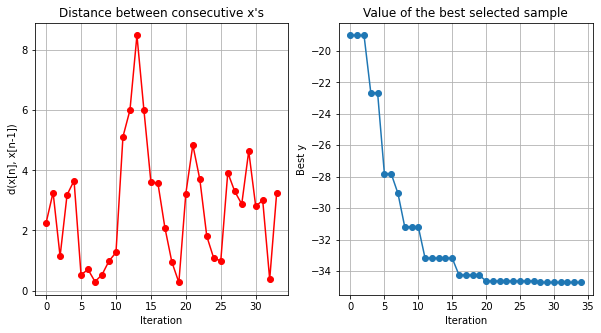

In [91]:
myopt.plot_convergence()